<a href="https://colab.research.google.com/github/Alton1998/Altons-Projects/blob/master/WastePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
ROOT_DIR = "."

In [3]:
KRAFT_DATA = os.path.join(ROOT_DIR,"/content/Kraft and ONP Rates May'17 to Feb'24 .xlsx")

In [4]:
kraft_df = pd.read_excel(KRAFT_DATA)

In [5]:
kraft_df.columns

Index(['Sr. No.', 'Date ', 'Time ', 'Kraft ', 'Old News Paper '], dtype='object')

In [6]:
kraft_df.head()

,Sr. No.,Date,Time,Kraft,Old News Paper
0,1,2017-05-25 00:00:00,NaN,17.50,17.00
1,2,2017-05-29 00:00:00,NaN,17.00,17.00
2,3,2017-06-02 00:00:00,NaN,16.75,16.50
3,4,2017-06-14 00:00:00,NaN,16.50,16.25
4,5,2017-02-17 00:00:00,NaN,16.25,16.25


In [7]:
kraft_df.describe()

,Sr. No.,Kraft,Old News Paper
count,420.000000,420.00000,340.000000
mean,210.500000,18.02369,17.976176
std,121.387808,4.92234,5.386782
min,1.000000,9.00000,9.000000
25%,105.750000,13.75000,13.250000
50%,210.500000,17.25000,16.200000
75%,315.250000,22.00000,22.500000
max,420.000000,31.50000,31.500000


In [8]:
kraft_df = kraft_df[['Date ','Kraft ', 'Old News Paper ']]

In [9]:
kraft_df.describe()

,Kraft,Old News Paper
count,420.00000,340.000000
mean,18.02369,17.976176
std,4.92234,5.386782
min,9.00000,9.000000
25%,13.75000,13.250000
50%,17.25000,16.200000
75%,22.00000,22.500000
max,31.50000,31.500000


In [10]:
def extract_date_time(date_time):
  date_time_split = str(date_time).split()
  if len(date_time_split) > 1:
    return pd.Series(date_time_split)
  return pd.Series([date_time_split[0],"NA"])


In [11]:
kraft_df[['Date Processed','Time Processed']] = kraft_df['Date '].apply(extract_date_time)

In [12]:
kraft_df = kraft_df[['Kraft ', 'Old News Paper ','Date Processed','Time Processed']]

In [13]:
kraft_df.describe()

,Kraft,Old News Paper
count,420.00000,340.000000
mean,18.02369,17.976176
std,4.92234,5.386782
min,9.00000,9.000000
25%,13.75000,13.250000
50%,17.25000,16.200000
75%,22.00000,22.500000
max,31.50000,31.500000


In [14]:
kraft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kraft            420 non-null    float64
 1   Old News Paper   340 non-null    float64
 2   Date Processed   420 non-null    object 
 3   Time Processed   420 non-null    object 
dtypes: float64(2), object(2)
memory usage: 13.2+ KB


In [15]:
kraft_df = kraft_df.drop(391)

In [16]:
kraft_df["Date Processed"] = pd.to_datetime(kraft_df["Date Processed"])

In [17]:
kraft_df.sort_values(by="Date Processed")

,Kraft,Old News Paper,Date Processed,Time Processed
4,16.25,16.25,2017-02-17,00:00:00
0,17.50,17.00,2017-05-25,00:00:00
1,17.00,17.00,2017-05-29,00:00:00
2,16.75,16.50,2017-06-02,00:00:00
3,16.50,16.25,2017-06-14,00:00:00
...,...,...,...,...
415,17.50,NaN,2024-02-09,00:00:00
416,17.25,NaN,2024-02-11,00:00:00
417,17.00,NaN,2024-02-11,00:00:00
418,16.50,NaN,2024-02-12,00:00:00


In [18]:
kraft_df_kraft = kraft_df[["Date Processed","Kraft "]]

In [19]:
kraft_df_kraft

,Date Processed,Kraft
0,2017-05-25,17.50
1,2017-05-29,17.00
2,2017-06-02,16.75
3,2017-06-14,16.50
4,2017-02-17,16.25
...,...,...
415,2024-02-09,17.50
416,2024-02-11,17.25
417,2024-02-11,17.00
418,2024-02-12,16.50


In [20]:
kraft_df_ONP = kraft_df[['Date Processed', 'Old News Paper ']].dropna()

In [21]:
kraft_df_ONP

,Date Processed,Old News Paper
0,2017-05-25,17.00
1,2017-05-29,17.00
2,2017-06-02,16.50
3,2017-06-14,16.25
4,2017-02-17,16.25
...,...,...
335,2022-11-01,20.50
336,2022-11-08,20.75
337,2022-11-12,20.50
338,2022-11-18,20.00


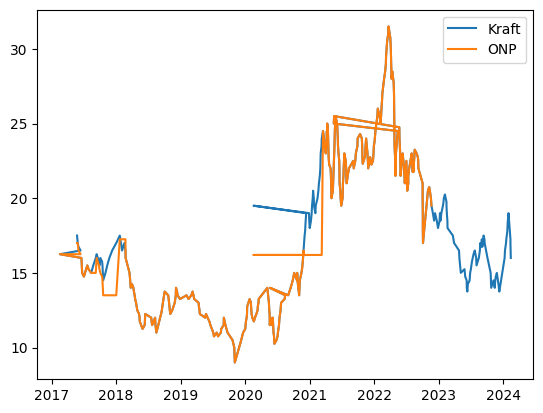

In [22]:
plt.plot(kraft_df_kraft['Date Processed'],kraft_df_kraft['Kraft '])
plt.plot(kraft_df_ONP["Date Processed"],kraft_df_ONP["Old News Paper "])
plt.legend(("Kraft","ONP"))

In [23]:
kraft_df_kraft["Smoothed"] = kraft_df_kraft['Kraft '].rolling(15).mean()

<ipython-input-23-fb663a85064b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kraft_df_kraft["Smoothed"] = kraft_df_kraft['Kraft '].rolling(15).mean()


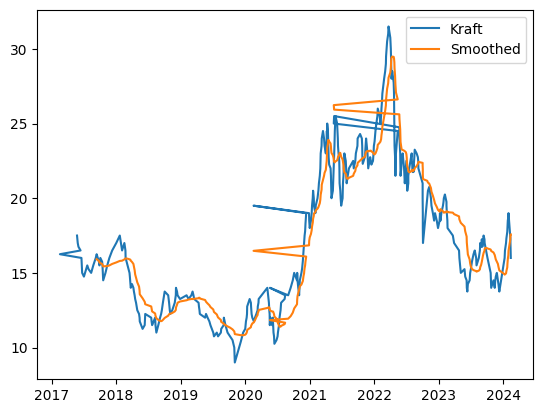

In [24]:
plt.plot(kraft_df_kraft['Date Processed'],kraft_df_kraft['Kraft '])
plt.plot(kraft_df_kraft['Date Processed'],kraft_df_kraft['Smoothed'])
plt.legend(("Kraft","Smoothed"))

In [25]:
kraft_df_kraft.set_index("Date Processed")

,Kraft,Smoothed
Date Processed,,
2017-05-25,17.50,NaN
2017-05-29,17.00,NaN
2017-06-02,16.75,NaN
2017-06-14,16.50,NaN
2017-02-17,16.25,NaN
...,...,...
2024-02-09,17.50,17.156667
2024-02-11,17.25,17.390000
2024-02-11,17.00,17.523333


In [26]:
test_percent = 0.2

In [27]:
train_test_split_index = int(np.round(len(kraft_df_kraft) - (0.2*len(kraft_df_kraft))))

In [28]:
train_test_split_index

335

In [29]:
kraft_df_kraft_train = kraft_df_kraft.iloc[:train_test_split_index]
kraft_df_kraft_test = kraft_df_kraft.iloc[train_test_split_index:]
print(len(kraft_df_kraft_train))
print(len(kraft_df_kraft_test))

335
84


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(kraft_df_kraft_train["Kraft "].values.reshape(-1,1))

MinMaxScaler()

In [33]:
X_train = scaler.transform(kraft_df_kraft_train["Kraft "].values.reshape(-1,1))
X_test = scaler.transform(kraft_df_kraft_test["Kraft "].values.reshape(-1,1))

In [34]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
kraft_generator = TimeseriesGenerator(X_train,X_train,length=10,batch_size=1)

In [36]:
kraft_generator[0]

(array([[[0.37777778],
         [0.35555556],
         [0.34444444],
         [0.33333333],
         [0.32222222],
         [0.31111111],
         [0.28888889],
         [0.26666667],
         [0.25555556],
         [0.28888889]]]),
 array([[0.27777778]]))

In [37]:
val_gen = TimeseriesGenerator(X_test,X_test,length=10,batch_size=1)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [39]:
model = Sequential()
model.add(LSTM(100,activation="relu",input_shape=(10,1)))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(25,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 47151 (184.18 KB)
Trainable params: 47151 

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [43]:
model.fit_generator(kraft_generator,epochs=10,validation_data=val_gen)

<ipython-input-43-58cf2a02f767>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(kraft_generator,epochs=10,validation_data=val_gen)


Epoch 1/10
325/325 [==============================] - 11s 21ms/step - loss: 0.0499 - val_loss: 0.0063
Epoch 2/10
325/325 [==============================] - 3s 9ms/step - loss: 0.0263 - val_loss: 0.0187
Epoch 3/10
325/325 [==============================] - 3s 9ms/step - loss: 0.0208 - val_loss: 0.0066
Epoch 4/10
325/325 [==============================] - 4s 13ms/step - loss: 0.0180 - val_loss: 0.0056
Epoch 5/10
325/325 [==============================] - 3s 10ms/step - loss: 0.0135 - val_loss: 0.0056
Epoch 6/10
325/325 [==============================] - 3s 9ms/step - loss: 0.0133 - val_loss: 0.0057
Epoch 7/10
325/325 [==============================] - 4s 13ms/step - loss: 0.0143 - val_loss: 0.0043
Epoch 8/10
325/325 [==============================] - 3s 9ms/step - loss: 0.0134 - val_loss: 0.0035
Epoch 9/10
325/325 [==============================] - 3s 9ms/step - loss: 0.0140 - val_loss: 0.0026
Epoch 10/10
325/325 [==============================] - 4s 11ms/step - loss: 0.0112 - val_loss: 

In [44]:
losses = pd.DataFrame(model.history.history)

<Axes: >

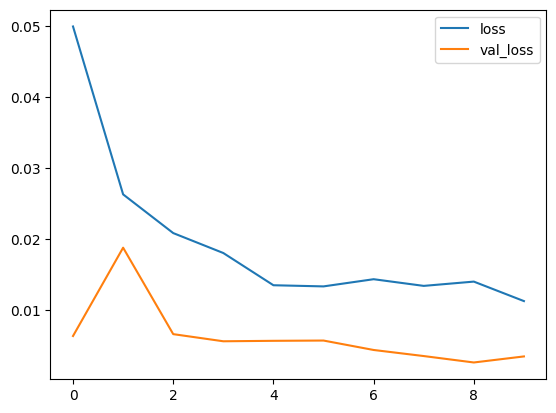

In [45]:
losses.plot()

<ipython-input-54-a6927f75516a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(val_gen)


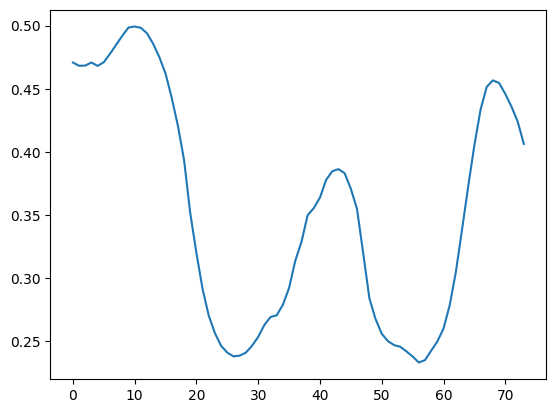

In [54]:
y_pred = model.predict_generator(val_gen)


In [60]:
y_actual = np.array([])
for y in val_gen:
  y_actual = np.append(y_actual,y[1][0])

[0.42222222]
[0.43333333]
[0.44444444]
[0.42222222]
[0.44444444]
[0.46666667]
[0.47777778]
[0.48888889]
[0.5]
[0.47777778]
[0.46666667]
[0.44444444]
[0.42222222]
[0.4]
[0.37777778]
[0.35555556]
[0.33333333]
[0.31111111]
[0.26666667]
[0.27777778]
[0.25555556]
[0.24444444]
[0.22222222]
[0.21111111]
[0.23333333]
[0.24444444]
[0.26666667]
[0.27777778]
[0.3]
[0.32222222]
[0.33333333]
[0.31111111]
[0.28888889]
[0.31111111]
[0.33333333]
[0.35555556]
[0.34444444]
[0.36666667]
[0.34444444]
[0.35555556]
[0.37777778]
[0.36666667]
[0.35555556]
[0.34444444]
[0.32222222]
[0.31111111]
[0.26666667]
[0.22222222]
[0.24444444]
[0.22222222]
[0.24444444]
[0.25555556]
[0.26666667]
[0.24444444]
[0.23333333]
[0.21111111]
[0.26666667]
[0.3]
[0.31111111]
[0.33333333]
[0.35555556]
[0.36888889]
[0.38888889]
[0.40222222]
[0.42222222]
[0.43333333]
[0.44444444]
[0.42222222]
[0.4]
[0.37777778]
[0.36666667]
[0.35555556]
[0.33333333]
[0.31111111]


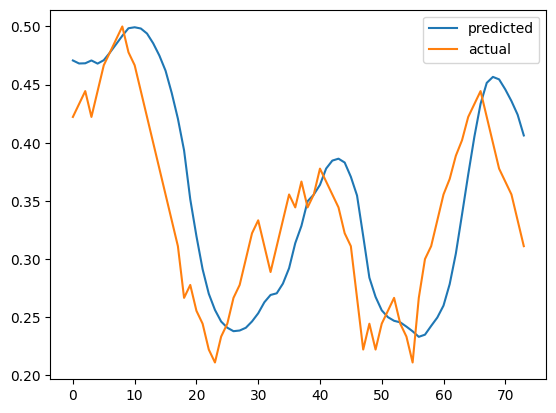

In [64]:
plt.plot(y_pred)
plt.plot(y_actual.reshape(-1,1))
plt.legend(("predicted","actual"))